# Snapshots
| Author  | Stanley A. Baronett |
|---------|---------------------|
| Created | 04/20/2022          |
| Updated | 09/28/2022          |

## **Figure 3.**

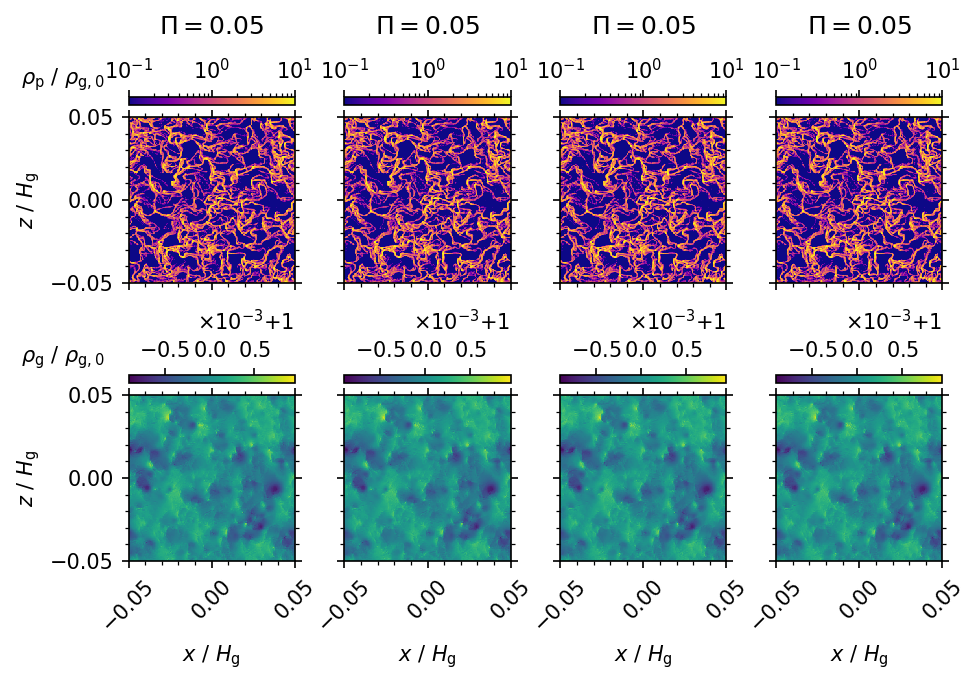

In [18]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import numpy as np

mpl.rcParams["axes.formatter.offset_threshold"] = 2
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(7, 4.5), dpi=150)
workdir = '../unstrat'
case = 'AB'
Pis = ['0.05', '0.05', '0.05', '0.05']
# Pis = ['0.01', '0.01', '0.05', '0.05']
res = '256'
# res = '1024'
vmin_p, vmax_p = 1e-1, 1e1 # AB CPDD > 85%; CPDD < 5%

for i, Pi in enumerate(Pis):
    # Collect parameters and plot densities
    path = f'{workdir}/{case}/{Pi}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    H_g = c_s/Omega
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xf, zf = data['x1f']/H_g, data['x2f']/H_g
    t = data['Time']
    clip = np.clip(data['rhop'][0], vmin_p, vmax_p)
    rhops = axs[0][i].pcolormesh(xf, zf, clip, norm=colors.LogNorm(), cmap='plasma')
    rhogs = axs[1][i].pcolormesh(xf, zf, data['rho'][0])

    # Add and format dust color bars, titles, and x-axis labels
    cb_rhop = fig.colorbar(rhops, ax=axs[0][i], location='top')
    # cb_rhop.ax.tick_params(axis='x', labelrotation=45)
    axs[0][i].set_title(f'$\Pi={Pi:s}$', pad=40)
    axs[0][i].set(aspect='equal')
    axs[1][i].set(xlabel=r'$x$ / $H_\mathrm{g}$', aspect='equal')

    # Add and format gas color bars
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-1, 1))
    cb_rhog = fig.colorbar(rhogs, ax=axs[1][i], location='top', format=formatter)
    # cb_rhog.ax.tick_params(axis='x', labelrotation=45)

for ax in axs.flat:
    ax.label_outer()
    ax.minorticks_on()
    ax.set(aspect='equal')
    ax.tick_params(axis='both', which='both', top=True, right=True)
    ax.tick_params(axis='x', labelrotation=45)

# Format and save figure
axs[0][0].text(-0.65, 1.31, r'$\rho_\mathrm{p}$ / $\rho_\mathrm{g,0}$', ha='left',
               va='top', transform=axs[0][0].transAxes)
axs[1][0].text(-0.65, 1.31, r'$\rho_\mathrm{g}$ / $\rho_\mathrm{g,0}$', ha='left',
               va='top', transform=axs[1][0].transAxes)
axs[0][0].set(ylabel=r'$z$ / $H_\mathrm{g}$')
axs[1][0].set(ylabel=r'$z$ / $H_\mathrm{g}$')
# plt.savefig(f'figs/{case}_snaps.png', dpi=1000, bbox_inches='tight', pad_inches=0.01)
plt.subplots_adjust(wspace=0.3)
plt.show()

## **Figure 4.**

Π = 0.05
	LxLyLz<ρ_p^2> = 56124.2 Hg^3 ρ_g,0^2
	LxLyLz<ρ_g^2> = 65536.7 Hg^3 ρ_g,0^2
Π = 0.05
	LxLyLz<ρ_p^2> = 56124.2 Hg^3 ρ_g,0^2
	LxLyLz<ρ_g^2> = 65536.7 Hg^3 ρ_g,0^2
Π = 0.10
	LxLyLz<ρ_p^2> = 10536.8 Hg^3 ρ_g,0^2
	LxLyLz<ρ_g^2> = 65538.1 Hg^3 ρ_g,0^2
Π = 0.10
	LxLyLz<ρ_p^2> = 10536.8 Hg^3 ρ_g,0^2
	LxLyLz<ρ_g^2> = 65538.1 Hg^3 ρ_g,0^2


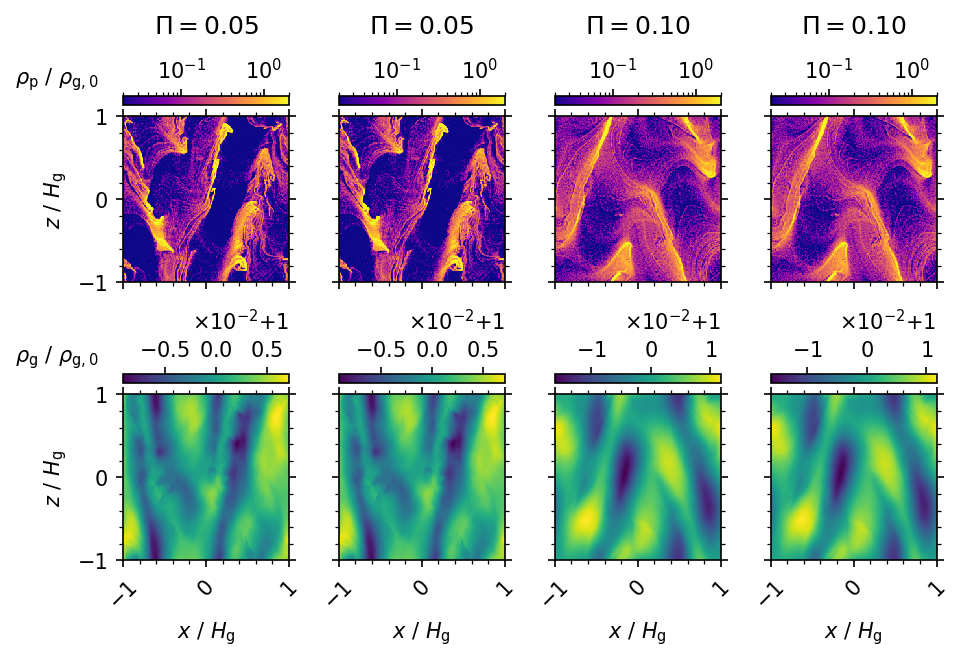

In [20]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import numpy as np

mpl.rcParams["axes.formatter.offset_threshold"] = 2
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(7, 4.5), dpi=150)
workdir = '../unstrat'
case = 'BA'
Pis = ['0.05', '0.05', '0.10', '0.10']
res = '256'
vmin_p, vmax_p = 2e-2, 2e0 # BA CPDD > 85%; CPDD < 5%

for i, Pi in enumerate(Pis):
    # Collect parameters and plot densities
    path = f'{workdir}/{case}/{Pi}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    H_g = c_s/Omega
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xf, zf = data['x1f']/H_g, data['x2f']/H_g
    t = data['Time']
    print(f'Π = {Pi}')
    denom = np.sum(data['rhop'][0]**2)
    print(f'\tLxLyLz<ρ_p^2> = {denom:.1f} Hg^3 ρ_g,0^2')
    denom = np.sum(data['rho'][0]**2)
    print(f'\tLxLyLz<ρ_g^2> = {denom:.1f} Hg^3 ρ_g,0^2')
    clip = np.clip(data['rhop'][0], vmin_p, vmax_p)
    rhops = axs[0][i].pcolormesh(xf, zf, clip, norm=colors.LogNorm(), cmap='plasma')
    rhogs = axs[1][i].pcolormesh(xf, zf, data['rho'][0])

    # Add and format dust color bars, titles, and x-axis labels
    cb_rhop = fig.colorbar(rhops, ax=axs[0][i], location='top')
    axs[0][i].set_title(f'$\Pi={Pi:s}$', pad=40)
    axs[0][i].set(aspect='equal')
    axs[1][i].set(xlabel=r'$x$ / $H_\mathrm{g}$', aspect='equal')

    # Add and format gas color bars
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-1, 1))
    cb_rhog = fig.colorbar(rhogs, ax=axs[1][i], location='top', format=formatter)

for ax in axs.flat:
    ax.label_outer()
    ax.minorticks_on()
    ax.set(aspect='equal')
    ax.tick_params(axis='both', which='both', top=True, right=True)
    ax.tick_params(axis='x', labelrotation=45)

# Format and save figure
axs[0][0].text(-0.65, 1.31, r'$\rho_\mathrm{p}$ / $\rho_\mathrm{g,0}$', ha='left',
               va='top', transform=axs[0][0].transAxes)
axs[1][0].text(-0.65, 1.31, r'$\rho_\mathrm{g}$ / $\rho_\mathrm{g,0}$', ha='left',
               va='top', transform=axs[1][0].transAxes)
axs[0][0].set(ylabel=r'$z$ / $H_\mathrm{g}$')
axs[1][0].set(ylabel=r'$z$ / $H_\mathrm{g}$')
# plt.savefig(f'figs/{case}_snaps.png', dpi=1000, bbox_inches='tight', pad_inches=0.01)
plt.subplots_adjust(wspace=0.3)
plt.show()